<a href="https://colab.research.google.com/github/marcoscapponi/DS3-Machine-Learning/blob/main/Trabajo_DS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis de noticias
##En este proyecto buscaremos predecir en una manera general, de que esta hablando la noticia.
###Estamos analizando un dataset de 7600 noticias, en las que tenemos 1900 noticias de deportes(sports), ciencia y tecnologia(sci/tech), negocios(business) y mundial(world).
###Buscaremos predecir si las noticias de business o de world son de indole positivas o negativas. Para las noticias de sports predeciremos si se trata de resultados de partidos o de noticias generales sobre algun deporte. Y para las noticias de sci/tech queremos averiguar si la noticia tiene que ver o habla de inteligenicia artificial, o si la noticia es sobre otra tematica.
###Aqui va una breve descripcion de como vamos a abarcar el proyecto, luego en este haremos una descripcion de cada paso que vayamos realizando, para que el trabajo sea lo mas entendible y practico posible.
###Primero cargaremos e importaremos todsa las librerias necesarias para el trabajo,  como sklearn, nltk, spacy, pandas, entre otras.
###Cargamos el archivo csv donde contiene el todas las noticias, y luego le haremos un breve analisis exploratorio a estos datos.
###Creamos una copia del dataset, para trabajar con mas tranuqilidad, sin riesgo de perdida o mala manipulacion de datos que nos coste perdida de informacion.
###Aqui comenzamos con el procesamiento del lenguaje natural, donde usaremos algunas de las tecnicas mas comunes como tokenizacion, cambiar todos los caracteres a minuscula, lematizacion, stemming, removemos las stopwords, y todos los signos de puntuacion.
###Por ultimo daremos paso a la prediccion y el deep learning, donde con metedos de prediccion como RandomForest, o LogisticRegression, mas las tecnicas de TF-IDF o Bag of Words, buscaremos lograr un entrenamiento acorde para la buena prediccion de las noticias.
###Finalmente haremos una conclusion final sobre el trabajo y nuestro resultado obtenido.




In [1]:
#Aqui importamos las librerias necesarias, con los modulos necesarios.
import pandas as pd
import numpy as np
import spacy
import re
from spacy import displacy
import nltk
import gdown
import chardet
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from transformers import pipeline
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 93.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# Importamos un archivo csv del que obtendremos la base de datos con la que trabajaremos
pd.set_option('display.max_colwidth', None)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('test.csv')

Saving test.csv to test.csv


##EDA (Analisis exploratorio de datos)

In [ ]:
df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.
1,4,The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com),"SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
2,4,Ky. Company Wins Grant to Study Peptides (AP),"AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
3,4,Prediction Unit Helps Forecast Wildfires (AP),"AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar."
4,4,Calif. Aims to Limit Farm-Related Smog (AP),"AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure."


In [ ]:
df.sample(5)

,Class Index,Title,Description
2808,1,Typhoon Meari kills nine in Japan,moving northeast over large parts of the count...
2359,3,Bush Set to Open Oil Reserve Spigot (Reuters),Reuters - With oil prices close to #36;50 a\b...
6838,4,iPod year #39;s hot gift,One of the hottest holiday gifts this year is ...
3520,2,"Yanks shock Twins, earn date with Sox: Another...","Just when you think you #39;ve seen it all, th..."
1417,2,Major teams bounce back in World Cup soccer qu...,LONDON: After a mixed bag of results in the we...


In [ ]:
df.tail()

,Class Index,Title,Description
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...
7599,3,EBay gets into rentals,EBay plans to buy the apartment and home renta...


In [ ]:
df.shape

(7600, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.3+ KB


In [ ]:
df.describe()

,Class Index
count,7600.000000
mean,2.500000
std,1.118108
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [ ]:
df.isnull().sum()

,0
Class Index,0
Title,0
Description,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Class Index,int64
Title,object
Description,object


In [3]:
#Aniadimos una nueva columna categoria, para poder distinguir con mayor facilidad la columna class index.
mapa_categoria = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}
df['Categoria'] = df['Class Index'].map(mapa_categoria)
display(df)

,Class Index,Title,Description,Categoria
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.,Business
1,4,The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com),"SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.",Sci/Tech
2,4,Ky. Company Wins Grant to Study Peptides (AP),"AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.",Sci/Tech
3,4,Prediction Unit Helps Forecast Wildfires (AP),"AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.",Sci/Tech
4,4,Calif. Aims to Limit Farm-Related Smog (AP),"AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.",Sci/Tech
...,...,...,...,...
7595,1,Around the world,"Ukrainian presidential candidate Viktor Yushchenko was poisoned with the most harmful known dioxin, which is contained in Agent Orange, a scientist who analyzed his blood said Friday.",World
7596,2,Void is filled with Clement,"With the supply of attractive pitching options dwindling daily -- they lost Pedro Martinez to the Mets, missed on Tim Hudson, and are resigned to Randy Johnson becoming a Yankee -- the Red Sox struck again last night, coming to terms with free agent Matt Clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ...",Sports
7597,2,Martinez leaves bitter,"Like Roger Clemens did almost exactly eight years earlier, Pedro Martinez has left the Red Sox apparently bitter about the way he was treated by management.",Sports
7598,3,5 of arthritis patients in Singapore take Bextra or Celebrex &lt;b&gt;...&lt;/b&gt;,SINGAPORE : Doctors in the United States have warned that painkillers Bextra and Celebrex may be linked to major cardiovascular problems and should not be prescribed.,Business


In [4]:
if 'Categoria' in df.columns and 'Class Index' in df.columns:
    cols = list(df.columns)
    cols.remove('Categoria')
    indice = cols.index('Class Index')
    cols.insert(indice + 1, 'Categoria')
    df = df[cols]
    display(df)
else:
    print("Error: Las columnas 'Categoria' o 'Class Index' no existen.")

,Class Index,Categoria,Title,Description
0,3,Business,Fears for T N pension after talks,Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.
1,4,Sci/Tech,The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com),"SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
2,4,Sci/Tech,Ky. Company Wins Grant to Study Peptides (AP),"AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
3,4,Sci/Tech,Prediction Unit Helps Forecast Wildfires (AP),"AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar."
4,4,Sci/Tech,Calif. Aims to Limit Farm-Related Smog (AP),"AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure."
...,...,...,...,...
7595,1,World,Around the world,"Ukrainian presidential candidate Viktor Yushchenko was poisoned with the most harmful known dioxin, which is contained in Agent Orange, a scientist who analyzed his blood said Friday."
7596,2,Sports,Void is filled with Clement,"With the supply of attractive pitching options dwindling daily -- they lost Pedro Martinez to the Mets, missed on Tim Hudson, and are resigned to Randy Johnson becoming a Yankee -- the Red Sox struck again last night, coming to terms with free agent Matt Clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ..."
7597,2,Sports,Martinez leaves bitter,"Like Roger Clemens did almost exactly eight years earlier, Pedro Martinez has left the Red Sox apparently bitter about the way he was treated by management."
7598,3,Business,5 of arthritis patients in Singapore take Bextra or Celebrex &lt;b&gt;...&lt;/b&gt;,SINGAPORE : Doctors in the United States have warned that painkillers Bextra and Celebrex may be linked to major cardiovascular problems and should not be prescribed.


In [ ]:
df['Description'].describe()

,Description
count,7600
unique,7594
top,"WASHINGTON (Reuters) - The U.S. economy slowed more sharply in the second quarter than first thought as oil prices rose and the trade gap swelled, the government said on Friday in a report that confirmed momentum faltered in the spring."
freq,2


In [ ]:
df['Categoria'].describe()

,Categoria
count,7600
unique,4
top,Business
freq,1900


In [ ]:
df['Categoria'].value_counts()

,count
Categoria,
Business,1900
Sci/Tech,1900
Sports,1900
World,1900


In [ ]:
# para el proyecto puedo ver si las noticias de business y world son de indoles positivas o negativas
# con sports puedo identificar si habla de resultados de partidos, o si habla de noticias generales
# para sci/tech puedo averiguar si la noticia trata de avances tecnologicos en base a inteligencia artificial, o si son de otra cosa

In [5]:
# Hacemos una copia del dataframe, para trabajar con tranquilidad, sin riesgo de perdida o transformacion de datos.
df1 = df.copy()

In [ ]:
 print(df1.loc[50,'Description'])
 print("\n"+"-"*80 + "\n")
 print(df.loc[1456, 'Description'])
 print("\n"+"-"*80 + "\n")
 print(df.loc[4580, 'Description'])
 print("\n"+"-"*80 + "\n")

AFP - A squadron of US Air Force F-15E fighters based in Alaska will fly to South Korea next month for temporary deployment aimed at enhancing US firepower on the Korean peninsula, US authorities said.

--------------------------------------------------------------------------------

Reuters - Alcoa Inc. , the world's largest\aluminum producer, on Thursday warned that third-quarter\results would fall far short of Wall Street expectations, hurt\by plant shutdowns, restructuring costs and weakness in some\markets.

--------------------------------------------------------------------------------

Hard on the heels of Microsoft announcing that it #39;s taken Live Communications Server 2005 gold, instant messaging management software vendors IMlogic and FaceTime on Tuesday both touted their support for the communication product.

--------------------------------------------------------------------------------



In [62]:
#Unimos la columna Title y Description, para facilitar el procesamiento del lenguaje natural.
df1['texto_completo'] = df1['Title'] + ' ' + df1['Description']

In [63]:
df1["texto_completo"] = df1["texto_completo"].str.replace(r'#39;s', '', regex=True)  # Elimina #39
df1["texto_completo"] = df1["texto_completo"].str.replace(r'#39', '', regex=True)  # Elimina #39
df1["texto_completo"] = df1["texto_completo"].str.replace(r'#39s', '', regex=True)  # Elimina #39
df1["texto_completo"] = df1["texto_completo"].str.replace(r'#39;s', '', regex=True)  # Corrige &#39;

In [64]:
df1['texto_completo'].sample(10)

,texto_completo
883,Santander accelerates Abbey bid Santander says it aims to complete its takeover of UK mortgage lender Abbey one month sooner than originally planned.
3495,"Trading blows When a can of worms is opened, all manner of slimy things crawl out. So it was when the US government fired the first shots in a fusillade against the European Union - by complaining to the World Trade Organisation"
4960,"Dial M for Music Mobile-phone makers scored a surprising hit four years ago when they introduced handsets equipped with tiny digital cameras. Today, nearly one-third of the cell phones sold worldwide do double duty as cameras"
4763,A fresh look at the stars... A supernova spotted by the Danish astronomer Tycho Brahe more than four centuries ago - which changed the course of human knowledge - has just yielded a further discovery: the companion star that triggered the great event.
6022,"SBC and Yahoo! extend pact to offer Internet service SAN ANTONIO SBC Communications and Yahoo are expanding their high-speed Internet service partnership to link video, wireless phone, Internet and other services."
3715,"New Year, New Notebooks For All T.C. Williams High School is handing out laptops to make sure students of all backgrounds have the latest equipment in an increasingly computerized world."
1198,Yankees' Brown Has Successful Surgery Kevin Brown had successful surgery on his broken left hand Sunday and vowed to pitch again for the Yankees this season.
6336,"No Changes for Certain Nortel Accounting Nortel Networks Corp. (NT.TO: Quote, Profile, Research) said on Wednesday that a far-reaching revision of its faulty financials will not require accounting changes for sales of certain fiber optic equipment."
5206,"Bush: Americans Expect Bipartisanship (AP) AP - President Bush is striking twin themes for a second term, vowing to fight hard for his political agenda while reaching across the aisle to Democrats."
2585,The Sims 2; Demon Stone; The Number Devil Getting a life gets a lot more complicated in this sequel to the best-selling computer game in history.


In [65]:
#Cambiamos todos las carecteres a minuscula.
df1['texto_completo_lower'] = df1['texto_completo'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [44]:
df1

,Class Index,Categoria,Title,Description,texto_completo,texto_completo_lower,texto_tokenizado,texto_tokenizado_sin_stopwords,texto_stemming,texto_lematizacion
0,3,Business,Fears for T N pension after talks,Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.,Fears for T N pension after talks Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.,fears for t n pension after talks unions representing workers at turner newall say they are disappointed after talks with stricken parent firm federal mogul,"[fears, for, t, n, pension, after, talks, unions, representing, workers, at, turner, newall, say, they, are, disappointed, after, talks, with, stricken, parent, firm, federal, mogul]","[fears, n, pension, talks, unions, representing, workers, turner, newall, say, disappointed, talks, stricken, parent, firm, federal, mogul]","[fear, n, pension, talk, union, repres, worker, turner, newal, say, disappoint, talk, stricken, parent, firm, feder, mogul]","[fear, n, pension, talk, union, represent, worker, turner, newall, say, disappointed, talk, stricken, parent, firm, federal, mogul]"
1,4,Sci/Tech,The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com),"SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.","The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.",the race is on second private team sets launch date for human spaceflight spacecom spacecom toronto canada a secondteam of rocketeers competing for the 3610 million ansari x prize a contest forprivately funded suborbital space flight has officially announced the firstlaunch date for its manned rocket,"[the, race, is, on, second, private, team, sets, launch, date, for, human, spaceflight, spacecom, spacecom, toronto, canada, a, secondteam, of, rocketeers, competing, for, the, 3610, million, ansari, x, prize, a, contest, forprivately, funded, suborbital, space, flight, has, officially, announced, the, firstlaunch, date, for, its, manned, rocket]","[race, second, private, team, sets, launch, date, human, spaceflight, spacecom, spacecom, toronto, canada, secondteam, rocketeers, competing, 3610, million, ansari, x, prize, contest, forprivately, funded, suborbital, space, flight, officially, announced, firstlaunch, date, manned, rocket]","[race, second, privat, team, set, launch, date, human, spaceflight, spacecom, spacecom, toronto, canada, secondteam, rocket, compet, 3610, million, ansari, x, prize, contest, forpriv, fund, suborbit, space, flight, offici, announc, firstlaunch, date, man, rocket]","[race, second, private, team, set, launch, date, human, spaceflight, spacecom, spacecom, toronto, canada, secondteam, rocketeers, compete, 3610, million, ansari, x, prize, contest, forprivately, fund, suborbital, space, flight, officially, announce, firstlaunch, date, man, rocket]"
2,4,Sci/Tech,Ky. Company Wins Grant to Study Peptides (AP),"AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.","Ky. Company Wins Grant to Study Peptides (AP) AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.",ky company wins grant to study peptides ap ap a company founded by a c

In [66]:
#Se remueven todos caracteres de puntuacion.
def remove_punctuation(text):
  return re.sub(r'[^a-zA-Z0-9\s]', '', text)
df1['texto_completo_lower'] = df1['texto_completo_lower'].apply(remove_punctuation)

In [67]:
#Se dividen el texto en tokens.
df1['texto_tokenizado'] = df1['texto_completo_lower'].apply(word_tokenize)
df1['texto_tokenizado'].head()

,texto_tokenizado
0,"[fears, for, t, n, pension, after, talks, unions, representing, workers, at, turner, newall, say, they, are, disappointed, after, talks, with, stricken, parent, firm, federal, mogul]"
1,"[the, race, is, on, second, private, team, sets, launch, date, for, human, spaceflight, spacecom, spacecom, toronto, canada, a, secondteam, of, rocketeers, competing, for, the, 3610, million, ansari, x, prize, a, contest, forprivately, funded, suborbital, space, flight, has, officially, announced, the, firstlaunch, date, for, its, manned, rocket]"
2,"[ky, company, wins, grant, to, study, peptides, ap, ap, a, company, founded, by, a, chemistry, researcher, at, the, university, of, louisville, won, a, grant, to, develop, a, method, of, producing, better, peptides, which, are, short, chains, of, amino, acids, the, building, blocks, of, proteins]"
3,"[prediction, unit, helps, forecast, wildfires, ap, ap, its, barely, dawn, when, mike, fitzpatrick, starts, his, shift, with, a, blur, of, colorful, maps, figures, and, endless, charts, but, already, he, knows, what, the, day, will, bring, lightning, will, strike, in, places, he, expects, winds, will, pick, up, moist, places, will, dry, and, flames, will, roar]"
4,"[calif, aims, to, limit, farmrelated, smog, ap, ap, southern, californias, smogfighting, agency, went, after, emissions, of, the, bovine, variety, friday, adopting, the, nations, first, rules, to, reduce, air, pollution, from, dairy, cow, manure]"


In [68]:
#Mostramos una lista de la las 20 listas mas comunes en ingles.
stopwords_eng = stopwords.words('english')
print(stopwords_eng[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [69]:
#Removemos las stopwords.
stop_words = set(stopwords.words('english'))
df1['texto_tokenizado_sin_stopwords'] = df1['texto_tokenizado'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df1['texto_tokenizado_sin_stopwords'].head()

,texto_tokenizado_sin_stopwords
0,"[fears, n, pension, talks, unions, representing, workers, turner, newall, say, disappointed, talks, stricken, parent, firm, federal, mogul]"
1,"[race, second, private, team, sets, launch, date, human, spaceflight, spacecom, spacecom, toronto, canada, secondteam, rocketeers, competing, 3610, million, ansari, x, prize, contest, forprivately, funded, suborbital, space, flight, officially, announced, firstlaunch, date, manned, rocket]"
2,"[ky, company, wins, grant, study, peptides, ap, ap, company, founded, chemistry, researcher, university, louisville, grant, develop, method, producing, better, peptides, short, chains, amino, acids, building, blocks, proteins]"
3,"[prediction, unit, helps, forecast, wildfires, ap, ap, barely, dawn, mike, fitzpatrick, starts, shift, blur, colorful, maps, figures, endless, charts, already, knows, day, bring, lightning, strike, places, expects, winds, pick, moist, places, dry, flames, roar]"
4,"[calif, aims, limit, farmrelated, smog, ap, ap, southern, californias, smogfighting, agency, went, emissions, bovine, variety, friday, adopting, nations, first, rules, reduce, air, pollution, dairy, cow, manure]"


In [70]:
#Recortamos las palabras para obtener una raiz aproximada.
stemmer = PorterStemmer()
df1['texto_stemming'] = df1['texto_tokenizado_sin_stopwords'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
df1['texto_stemming'].head()

,texto_stemming
0,"[fear, n, pension, talk, union, repres, worker, turner, newal, say, disappoint, talk, stricken, parent, firm, feder, mogul]"
1,"[race, second, privat, team, set, launch, date, human, spaceflight, spacecom, spacecom, toronto, canada, secondteam, rocket, compet, 3610, million, ansari, x, prize, contest, forpriv, fund, suborbit, space, flight, offici, announc, firstlaunch, date, man, rocket]"
2,"[ky, compani, win, grant, studi, peptid, ap, ap, compani, found, chemistri, research, univers, louisvil, grant, develop, method, produc, better, peptid, short, chain, amino, acid, build, block, protein]"
3,"[predict, unit, help, forecast, wildfir, ap, ap, bare, dawn, mike, fitzpatrick, start, shift, blur, color, map, figur, endless, chart, alreadi, know, day, bring, lightn, strike, place, expect, wind, pick, moist, place, dri, flame, roar]"
4,"[calif, aim, limit, farmrel, smog, ap, ap, southern, california, smogfight, agenc, went, emiss, bovin, varieti, friday, adopt, nation, first, rule, reduc, air, pollut, dairi, cow, manur]"


In [71]:
#Reducimos las palabras a su terminos base e indicamos que tipo de palabra es.
lemmatizer = WordNetLemmatizer()
def lemmatize_with_pos(tokens):
  pos_tags = pos_tag(tokens)
  lemmas = []
  for token, tag in pos_tags:
    pos = get_wordnet_pos(tag)
    lemma = lemmatizer.lemmatize(token, pos=pos) if pos else token
    lemmas.append(lemma)
  return lemmas

def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return 'a'
  elif treebank_tag.startswith('V'):
    return 'v'
  elif treebank_tag.startswith('N'):
    return 'n'
  elif treebank_tag.startswith('R'):
    return 'r'
  else:
    return None
df1['texto_lematizacion'] = df1['texto_tokenizado_sin_stopwords'].apply(lemmatize_with_pos)
df1['texto_lematizacion'].head()

,texto_lematizacion
0,"[fear, n, pension, talk, union, represent, worker, turner, newall, say, disappointed, talk, stricken, parent, firm, federal, mogul]"
1,"[race, second, private, team, set, launch, date, human, spaceflight, spacecom, spacecom, toronto, canada, secondteam, rocketeers, compete, 3610, million, ansari, x, prize, contest, forprivately, fund, suborbital, space, flight, officially, announce, firstlaunch, date, man, rocket]"
2,"[ky, company, win, grant, study, peptide, ap, ap, company, found, chemistry, researcher, university, louisville, grant, develop, method, produce, good, peptide, short, chain, amino, acid, building, block, protein]"
3,"[prediction, unit, help, forecast, wildfire, ap, ap, barely, dawn, mike, fitzpatrick, start, shift, blur, colorful, map, figure, endless, chart, already, know, day, bring, lightning, strike, place, expect, wind, pick, moist, place, dry, flame, roar]"
4,"[calif, aim, limit, farmrelated, smog, ap, ap, southern, california, smogfighting, agency, go, emission, bovine, variety, friday, adopt, nation, first, rule, reduce, air, pollution, dairy, cow, manure]"


In [72]:
#Un simple ejemplo de las tecnicas de nlp usadas, ejemplificando con un arbol de dependencias.
nlp = spacy.load('en_core_web_sm')
sentence = df1['texto_completo'].iloc[0]
doc = nlp(sentence)
displacy.render(doc, style="dep", jupyter=True)

In [73]:
#Mostramos las palabras mas comunes
tokens_lematizados = [token for tokens_list in df1['texto_lematizacion'] for token in tokens_list]
frecuencia_palabras_lematizadas = Counter(tokens_lematizados)
frecuencia_palabras_lematizadas.most_common(20)

[('say', 1850),
 ('new', 1338),
 ('us', 1215),
 ('reuters', 1037),
 ('ap', 1030),
 ('year', 729),
 ('company', 636),
 ('first', 606),
 ('two', 585),
 ('world', 519),
 ('monday', 503),
 ('tuesday', 490),
 ('one', 488),
 ('report', 482),
 ('game', 462),
 ('make', 452),
 ('thursday', 451),
 ('win', 449),
 ('wednesday', 444),
 ('state', 444)]

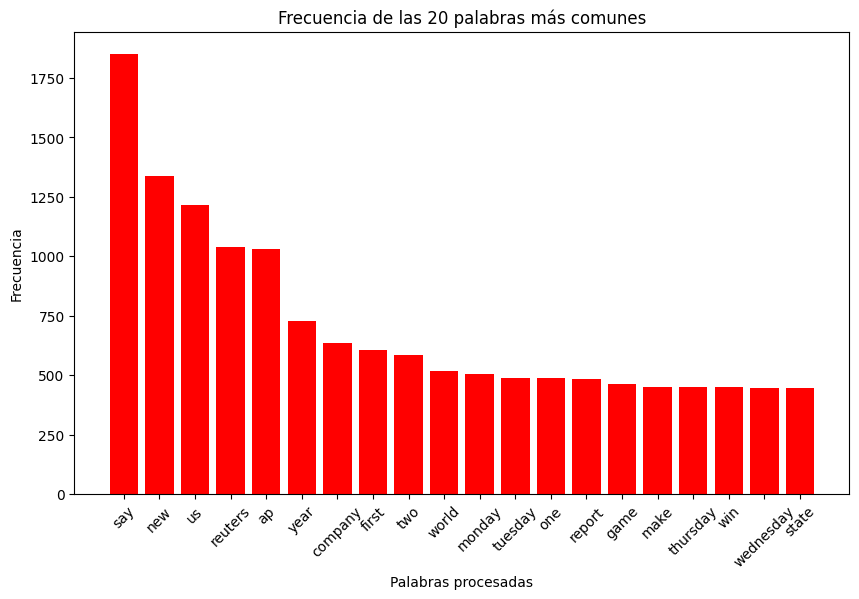

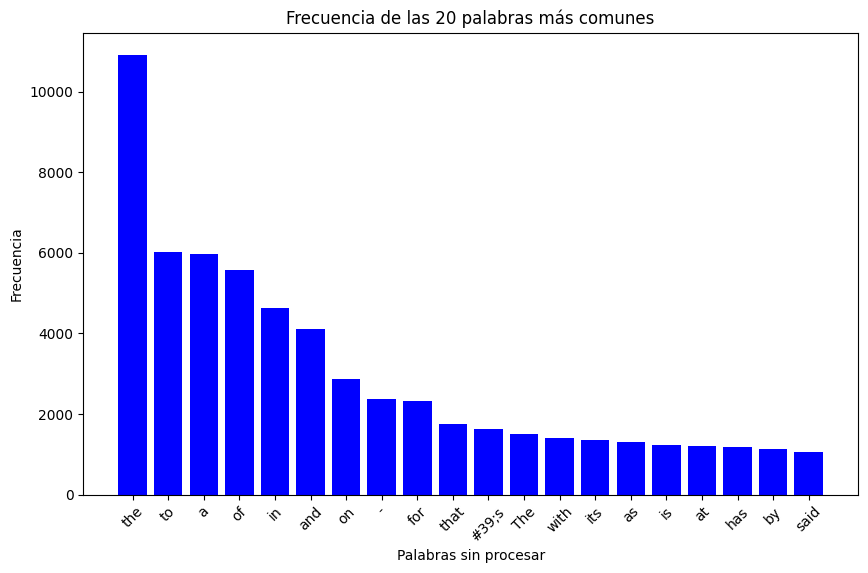

In [74]:
#Hacemos un grafico comparando las 20 palabras mas usadas antes de procesarlas,  y las 20 mas usadas luego de procesarlas.
palabras_lem, frecuencia_lem = zip(*frecuencia_palabras_lematizadas.most_common(20))
plt.figure(figsize=(10, 6))
plt.bar(palabras_lem, frecuencia_lem, color='red')
plt.xlabel('Palabras procesadas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las 20 palabras más comunes')
plt.xticks(rotation=45)
plt.show()

tokens_sin_normalizar = [token for Description in df1['Description'] for token in Description.split()]
frecuencia_palabras_sin_normalizar = Counter(tokens_sin_normalizar)
palabras_sin_norm, frecuencia_sin_norm = zip(*frecuencia_palabras_sin_normalizar.most_common(20))
plt.figure(figsize=(10, 6))
plt.bar(palabras_sin_norm, frecuencia_sin_norm, color='blue')
plt.xlabel('Palabras sin procesar')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las 20 palabras más comunes')
plt.xticks(rotation=45)
plt.show()

#Empezamos con el Deep learning


Palabras más asociadas a reseñas positivas:
        palabra  coeficiente
356          ap     4.916098
2345       iraq     3.739077
238         afp     3.694526
2468     killed     2.385955
3082    nuclear     2.356538
3453  president     2.298500
3284     people     2.295446
2883   minister     2.227482
3389     police     2.077624
513     baghdad     1.984771

Palabras más asociadas a reseñas negativas:
       palabra  coeficiente
3575   quarter    -1.911243
3916     sales    -1.912032
1432    dollar    -1.999234
788   business    -2.012385
4066    shares    -2.070314
2872   million    -2.077057
3465    prices    -2.099654
1136      corp    -2.428296
3117       oil    -2.457153
1044   company    -3.285297


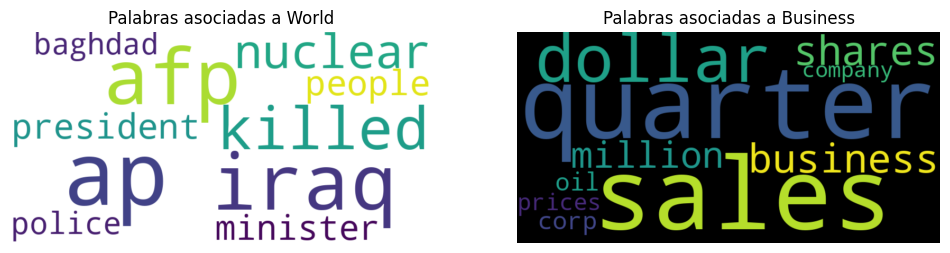

In [75]:
#En estas lineas de codigo mostramos con una world cloud, las 10 palabras mas usadas en noticias de business
#y las 10 palabras mas utilizadas en las noticias de world.
df1_bw = df1[df1['Categoria'].isin(['Business', 'World'])]

#Vectorizamos con tfidf
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df1_bw['texto_completo'])

#Elegimos un modelo de prediccion
model = LogisticRegression(class_weight='balanced')

#Entrenamos el modelo
model.fit(tfidf_matrix, df1_bw['Categoria'])

#Almacenamos las palabras vectorizadas
palabras = tfidf_vectorizer.get_feature_names_out()

#Almacenamos los coeficientes de las palabras
coeficientes = model.coef_[0]

#Hacemos un dataframe con las palabras y sus coeficientes
df_coef = pd.DataFrame({'palabra': palabras, 'coeficiente': coeficientes})

#Ordenamos el dataframe por sus valores
df_coef = df_coef.sort_values(by='coeficiente', ascending=False)

#Mostramos los resultados
print("\nPalabras más asociadas a reseñas positivas:")
print(df_coef.head(10))

print("\nPalabras más asociadas a reseñas negativas:")
print(df_coef.tail(10))


top10 = df_coef.head(10)
top10_ultimo = df_coef.tail(10)

palabras_positivas = dict(zip(top10['palabra'], top10['coeficiente']))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palabras_positivas)

palabras_negativas = dict(zip(top10_ultimo['palabra'], top10_ultimo['coeficiente']))
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(palabras_negativas)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Palabras asociadas a World')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Palabras asociadas a Business')
plt.axis('off')

plt.show()

Distribución de sentimientos:
etiqueta_sentimiento
Negativo    1825
Positivo    1527
Neutral      448
Name: count, dtype: int64

Distribución por categoría:
etiqueta_sentimiento  Negativo  Neutral  Positivo   All
Categoria                                              
Business                   706      265       929  1900
World                     1119      183       598  1900
All                       1825      448      1527  3800

Estadísticas descriptivas:
            count      mean       std     min     25%  50%      75%     max
Categoria                                                                  
Business   1900.0  0.062872  0.517493 -0.9682 -0.3818  0.0  0.51060  0.9501
World      1900.0 -0.231197  0.591504 -0.9861 -0.8074 -0.3  0.24715  0.9744

Ejemplos de Business - Positivo:

Título: Airlines Agree to Cut Flights at Chicago O'Hare
Descripción:  CHICAGO (Reuters) - U.S. airlines have agreed to limit  flights into Chicago's O'Hare International Airport to 88  arrivals pe

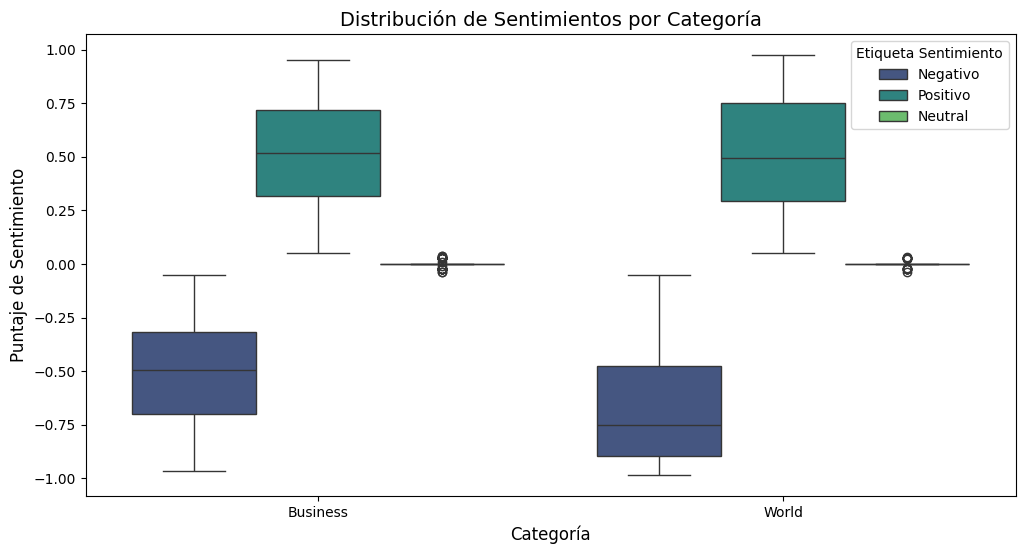

In [59]:
#Hacemos un analisis de sentimiento de las noticias de business y world
df_bw = df1[df1['Categoria'].isin(['Business', 'World'])].copy()

#definimos el analisis de sentimiento
sia = SentimentIntensityAnalyzer()

df_bw['sentimiento'] = df_bw['texto_completo'].apply(lambda x: sia.polarity_scores(x)['compound'])

#definimos los valores que delimitan si un texto es positivo o negativo o en su defecto neutral
df_bw['etiqueta_sentimiento'] = df_bw['sentimiento'].apply(lambda x: 'Positivo' if x > 0.05 else 'Negativo' if x < -0.05 else 'Neutral')

#Análisis general
print("Distribución de sentimientos:")
print(df_bw['etiqueta_sentimiento'].value_counts())

#Reporte por categoría
print("\nDistribución por categoría:")
print(pd.crosstab(df_bw['Categoria'], df_bw['etiqueta_sentimiento'], margins=True))

#Estadísticas de sentimiento por categoría
print("\nEstadísticas descriptivas:")
print(df_bw.groupby('Categoria')['sentimiento'].describe())

#Ejemplos representativos
def mostrar_ejemplos(categoria, sentimiento, n=5):
    print(f"\nEjemplos de {categoria} - {sentimiento}:")
    ejemplos = df_bw[(df_bw['Categoria'] == categoria) &
                    (df_bw['etiqueta_sentimiento'] == sentimiento)].sample(n)
    for _, row in ejemplos.iterrows():
        print(f"\nTítulo: {row['Title']}")
        print(f"Descripción: {row['Description'][:150]}...")
        print(f"Score: {row['sentimiento']:.2f}")

#Mostrar ejemplos
mostrar_ejemplos('Business', 'Positivo')
mostrar_ejemplos('World', 'Negativo')

#Visualización mejorada
plt.figure(figsize=(12, 6))
sns.boxplot(x='Categoria', y='sentimiento', data=df_bw, hue='etiqueta_sentimiento', palette='viridis')
plt.title('Distribución de Sentimientos por Categoría', fontsize=14)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Puntaje de Sentimiento', fontsize=12)
plt.legend(title='Etiqueta Sentimiento')
plt.show()

<ipython-input-76-5cb7fba91a61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_sports['description_str'] = df1_sports['Description'].apply(lambda x: ''.join(x) if isinstance(x, list) else x)


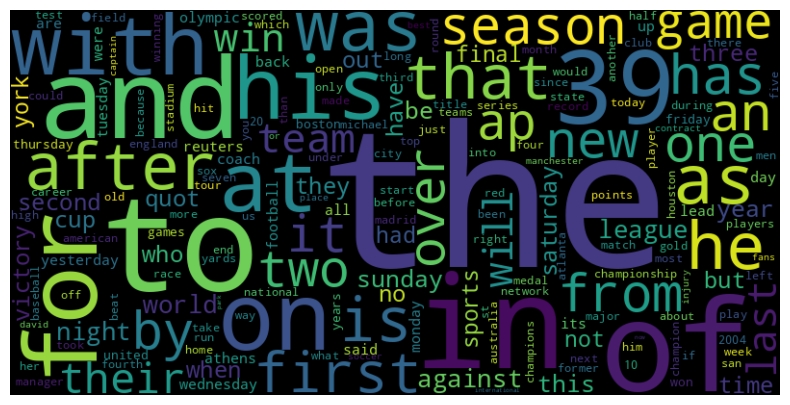

In [76]:
#Aqui mostraremos en un wordcloud las que mas aparecen en las noticias de sports.
df1_sports = df1[df1['Categoria'] == 'Sports']
df1_sports['description_str'] = df1_sports['Description'].apply(lambda x: ''.join(x) if isinstance(x, list) else x)

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df1_sports['description_str'])

n_grams = vectorizer.get_feature_names_out()

frecuencias = X.toarray().sum(axis=0)

n_grams_frecuencias = dict(zip(n_grams, frecuencias))

wordcloud = WordCloud(width=800, height=400, background_color='Black').generate_from_frequencies(n_grams_frecuencias)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Mejores parametros: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Reporte de clasificación para SVM:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       185
           1       0.88      0.76      0.82       195

    accuracy                           0.82       380
   macro avg       0.83      0.83      0.82       380
weighted avg       0.83      0.82      0.82       380


Matriz de confusión para SVM


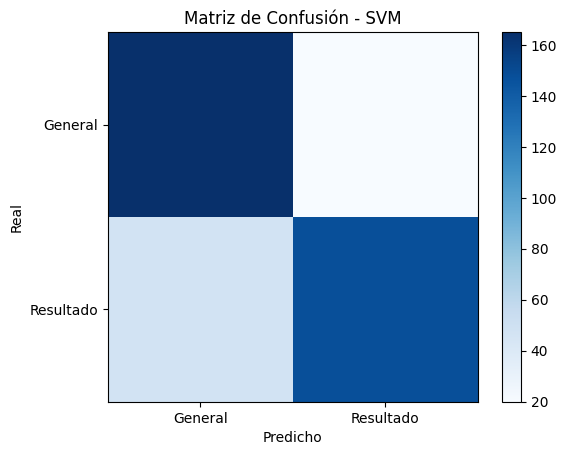


Predicciones correctas como noticias generales (0):
                                                                                                                                                                                                                                        texto_completo  \
2477                                                                                        Shanghai, Qualifying: Surprises all round Michael Schumacher spun and Sauber looked strong this afternoon. Fernando and Jacques went sixth and thirteenth.   
5268  Bonds deserves a  quot;C quot; for historic 73 What symbol should be placed next to Barry Bonds #39; monumental mark of 73 home runs? How about a capital  quot;C quot; for  quot;The Cream, quot;  quot;The Clear, quot;  quot;The Cheat quot;?   
4786                         Elarton agrees to \$850,000, one-year deal with Indians Scott Elarton, who pitched effectively late in the season after a slow start with Cleveland, agreed Thursday to 

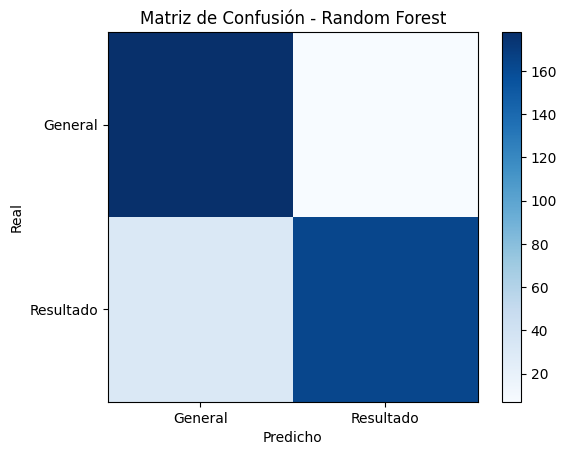


Predicciones correctas como noticias generales (0):
                                                                                                                                                                                                           texto_completo  \
5570                         No. 6 Syracuse Crushes N. Colo. 104-54 Syracuse #39;s Hakim Warrick dunks against Northern Colorado during the first half in Syracuse, NY, Thursday, Nov. 11, 2004. (AP Photo/Kevin Rivoli).   
1418                                        Inzaghi fit for start of season AC Milan striker Filippo Inzaghi is fit for the start of the Serie A season after recovering from an ankle injury, the club said on Thursday.   
1741  Eagles Bring Back Levens; Place Andrews on IR (Reuters) Reuters - The Philadelphia Eagles\made several roster moves on Tuesday, including bringing back\Dorsey Levens and placing Shawn Andrews on injured reserve.   

      es_resultado  prediccion  
5570             0           

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Mejores parametros: {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 1.0}

Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       185
           1       1.00      0.84      0.91       195

    accuracy                           0.92       380
   macro avg       0.93      0.92      0.92       380
weighted avg       0.93      0.92      0.92       380


Matriz de confusión para XGBoost


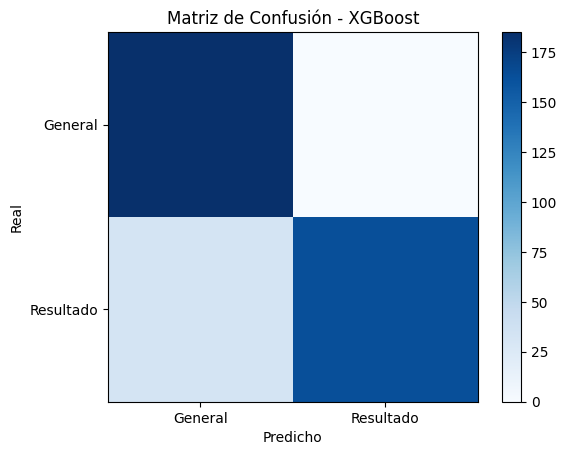


Predicciones correctas como noticias generales (0):
                                                                                                                                                                                                                                                    texto_completo  \
1596                                                                Cordero sets new club mark com. Cordero notched his 44th save of the season Sunday to establish a Rangers record previously held by current Rangers roving pitching instructor John Wetteland.   
1202                    Jets: Abraham is likely to miss 3 games Though coach Herman Edwards ruled defensive end John Abraham out for only this Sunday #39;s game against the Steelers with a sprained lateral collateral ligament in his right knee, he #39;ll be    
5882  Agent: Extortion Plot Targeted Sheffield (AP) AP - New York Yankees slugger Gary Sheffield and his wife were the targets of a blackmailer who claimed to ha

In [20]:
#Analizamos las si la noticia habla de algun tipo de resultado, o si trata de otro tipo de noticia.
keywords = ['win', 'loss', 'score', 'beat', 'defeat', 'championship', 'victory', 'lose', 'trophy', 'final', 'victory against', 'beat by', 'cup']

#copiamos un dataset con solo las noticias de deportes
df_sports = df1[df1['Categoria'] == 'Sports'].copy()

#creamos una columna resultado para determinar si la noticia trata sobre un resultado o no
df_sports['es_resultado'] = df_sports['texto_completo'].apply(lambda x: 1 if any(word in x.lower() for word in keywords) else 0)

#vectorizamos el texto
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=2000)

#creamos las variables X e y para usarlas como variables de entrenamiento, y de prediccion
X = vectorizer.fit_transform(df_sports['texto_completo'])
y = df_sports['es_resultado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creamos una funcion con 3 modelos de prediccion distintas para luego determinar cual nos da mejor resultado
def evaluar_modelos():
    modelos = {
        'SVM': { 'model': SVC(class_weight='balanced'),
                 'param_grid': {'C': [0.1, 1, 10],
                                'kernel': ['linear', 'rbf', 'poly'],
                                'gamma': ['scale', 'auto', 0.1]}

                 },
        'Random Forest': { 'model': RandomForestClassifier(class_weight='balanced', random_state=42),
                           'param_grid': {'n_estimators': [50, 100, 200],
                                          'max_depth': [None, 10, 20]}
                          },
        'XGBoost': {'model': XGBClassifier(
                scale_pos_weight=np.sum(y == 0)/np.sum(y == 1),
                eval_metric='logloss',
                use_label_encoder=False
            ),
            'param_grid': {
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5],
                'subsample': [0.8, 1.0]
            }
        }
    }
    #imprimos los mejores resultados, y ejemplos de los valores obtenidos
    test_indices = y_test.index
    test_df = df_sports.loc[test_indices, ['texto_completo', 'es_resultado']].copy()
    for nombre, config in modelos.items():
        grid = GridSearchCV( estimator=config['model'], param_grid=config['param_grid'], cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        print(f"\nMejores parametros: {grid.best_params_}")

        y_pred = best_model.predict(X_test)
        test_df['prediccion'] = y_pred

        print(f"\nReporte de clasificación para {nombre}:")
        print(classification_report(y_test, y_pred))

        print(f"\nMatriz de confusión para {nombre}")

        cm = confusion_matrix(y_test, y_pred)
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Matriz de Confusión - {nombre}')
        plt.colorbar()
        plt.xticks([0, 1], ['General', 'Resultado'])
        plt.yticks([0, 1], ['General', 'Resultado'])
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.show()
        #mostramos ejemplos de las noticias divididas entre noticias generales, de resultado, y las noticias predichas incorrectamente
        print("\nPredicciones correctas como noticias generales (0):")
        print(test_df[(test_df['es_resultado'] == 0) & (test_df['prediccion'] == 0)].sample(3)[['texto_completo', 'es_resultado', 'prediccion']])

        print("\nPredicciones correctas como resultado (1):")
        print(test_df[(test_df['es_resultado'] == 1) & (test_df['prediccion'] == 1)].sample(3)[['texto_completo', 'es_resultado', 'prediccion']])

        print("\nPredicciones incorrectas:")
        print(test_df[test_df['es_resultado'] != test_df['prediccion']].sample(3)[['texto_completo', 'es_resultado', 'prediccion']])

evaluar_modelos()


Fitting 5 folds for each of 4 candidates, totalling 20 fits

Reporte de clasificacion:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       377
           1       0.00      0.00      0.00         3

    accuracy                           0.99       380
   macro avg       0.50      0.50      0.50       380
weighted avg       0.98      0.99      0.99       380



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


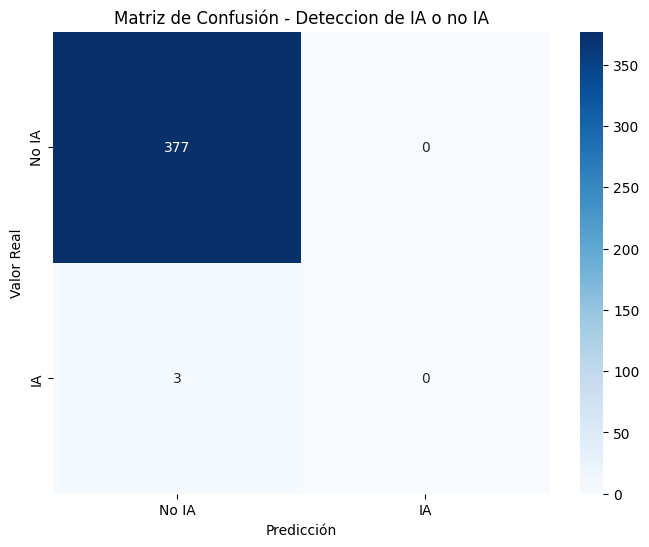

In [21]:
#Buscaremos diferenciar si la nocitia de categoria sci/tech trata sobre la inteligencia artificial o no.
ia_keywords = {'artificial intelligence', 'machine learning', 'deep learning',
               'neural network', 'neural networks', 'ai system', 'ai model',
               'natural language processing', 'computer vision', 'generative ai',
               'chatgpt', 'llm', 'large language model', 'autonomous system',
               'reinforcement learning', 'algorithmic learning', 'AI'}

#creamos una copia del dataset solo con las filas de noticias de sci/tech
df_scitech = df1[df1['Categoria'] == 'Sci/Tech'].copy()

#aqui diferenciamos si la noticia tiene alguna palabra de las que estan contenidas en ia_keywords.
df_scitech['es_ia'] = df_scitech['texto_completo'].apply(lambda x: 1 if any(word in x.lower() for word in ia_keywords) else 0)

#Vectorizamos con tfidf
vectorizer = TfidfVectorizer(max_features=1500,
                             stop_words='english',
                             ngram_range=(1,3,))

X = vectorizer.fit_transform(df_scitech['texto_completo'])

y = df_scitech['es_ia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

param_grid = {'n_estimators': [100, 200],
              'class_weight': ['balanced', None]}

#aplicamos un modelo de prediccion con valores ajustados
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

#usamos los mejores datos obtenidos
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#mostramos un reporte de clasificacion
print("\nReporte de clasificacion:")
print(classification_report(y_test, y_pred))

#hacemos una matriz de confusion para visualizar los resultados
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No IA', 'IA'], yticklabels=['No IA', 'IA'])
plt.title('Matriz de Confusión - Deteccion de IA o no IA')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

#Conclusion
##Como conclusion podemos notar que nuestros dos metodos de deep learning funcionaron con eficacia y nos dieron buenos resultados. Nos inclinamos mas por el metodo tf-idf, y el metodo de prediccion que mejor accuaracy nos dio fue el XG-Boost.
###En el analisis para determinar si las noticias de business o world eran positivas o negativas, utilizamos Sentiment Intensity Analyzer, y una funcion para separar el valor del texto en positivo o negativo segun su valor/peso.
###En el caso de la noticias de sports, usamos la metodologia de tf-idf y comparamos entre tres modelos de prediccion para seleccionar cual es el que mejor resultado nos brinda, que en este caso fue el XG-Boost con un accuaracy de 0.92.
###Para el ultimo caso de estudio, quisimos buscar si las noticias de sci/tech hablaban de inteligencia artificial o no. Para esto vectorizamos las palabras y luego con el modelo random forest classifier y un uso de gridsearchCV para obtener mejor presicion en la busqueda, obtenemos resultados casi perfectos con accuaracy de 0.99.
###Como proyeccion a futuro, si usamos un dataset de mayor tamanio, con mas noticias, debemos analizar y de necesitarlo, ajustar parametros o probar modelos nuevos para no perder nuestros valores de accuaracy.